### 데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv("manhattan.csv")
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


### 데이터 세트 분리하기

In [2]:
from sklearn.model_selection import train_test_split
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df[['rent']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)


### 모델 생성하기

In [3]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
my_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
my_predict = mlr.predict(my_apartment)

In [5]:
y_predicted = mlr.predict(x_test)

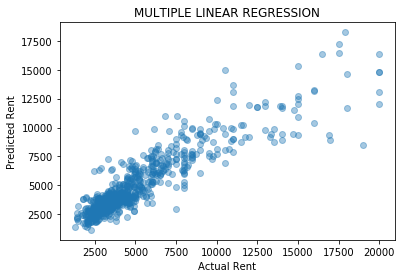

In [6]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

### 회귀계수와 상수 확인하기

In [7]:
print(mlr.coef_)

[[-299.49033629 1162.87881607    4.80907472  -17.90438072   22.85838108
    -7.30388368 -113.81628606    5.14288286  103.36552525 -127.70198028
    98.47365793   -3.64322292 -130.96105628   43.1140585 ]]


### 상관 살펴보기

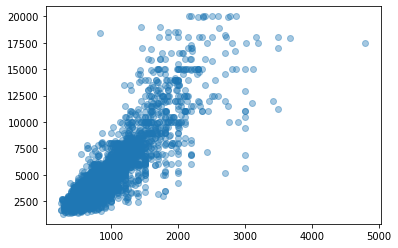

In [8]:
# 주택의 면적 'size_sqft'과 가격 'rent'
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
plt.show()

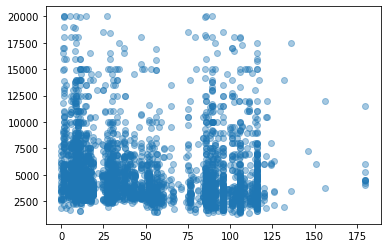

In [9]:
# 주택이 얼마나 오래 전에 지어졌는지 'building_age_yrs'와 가격 'rent'
plt.scatter(df[['building_age_yrs']], df[['rent']], alpha=0.4)
plt.show()

### 모델의 정확도 평가하기

In [13]:
y

,rent
0,2550
1,11500
2,4500
3,4795
4,17500
...,...
3534,4210
3535,6675
3536,1699
3537,3475


In [14]:
y_predict

array([[ 4443.68555145],
       [ 2612.01438028],
       [11006.86628586],
       [ 7751.39568359],
       [ 3969.4331131 ],
       [ 2845.95927978],
       [ 3915.4079691 ],
       [ 4048.29898973],
       [ 3511.38855255],
       [ 5970.33825482],
       [ 3011.00799457],
       [ 6091.00385086],
       [ 7558.25057364],
       [11861.72884127],
       [ 3493.01886695],
       [ 3444.20195282],
       [ 2288.85733306],
       [ 2095.8012229 ],
       [ 4625.21759751],
       [ 6539.07988961],
       [ 4885.75437901],
       [ 2849.59337643],
       [ 5263.4068368 ],
       [ 3933.97146679],
       [ 4644.67938606],
       [ 8540.57504721],
       [ 1928.97960346],
       [ 6132.05507864],
       [ 2839.35747687],
       [ 5708.5879495 ],
       [11954.85403019],
       [ 2249.77893989],
       [ 4151.23609463],
       [ 7307.32608321],
       [ 5971.65192219],
       [ 5917.16895937],
       [ 6385.54547158],
       [ 4062.49271667],
       [ 7907.93364971],
       [ 2501.30645343],


In [11]:
((y - y.mean()) ** 2).sum()

rent    3.539224e+10
dtype: float64

In [12]:
print(mlr.score(x_train, y_train))

0.7706337600626844
